In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
X_test = df_test.iloc[:,:]

In [6]:
arr = []
for i in X.columns:
    print(X[i].isnull().sum()/len(X)*100)
    if X[i].isnull().sum()/len(X)*100>40:
        X = X.drop(columns = i)
        arr.append(i)
print(arr)
#print(X_test.isnull().sum()/len(X_test)*100)

0.0
0.0
0.0
17.73972602739726
0.0
0.0
93.76712328767123
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.547945205479452
0.547945205479452
0.0
0.0
0.0
2.5342465753424657
2.5342465753424657
2.6027397260273974
2.5342465753424657
0.0
2.6027397260273974
0.0
0.0
0.0
0.0
0.0
0.0
0.0684931506849315
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
47.26027397260274
5.5479452054794525
5.5479452054794525
5.5479452054794525
0.0
0.0
5.5479452054794525
5.5479452054794525
0.0
0.0
0.0
0.0
0.0
0.0
0.0
99.52054794520548
80.75342465753424
96.30136986301369
0.0
0.0
0.0
0.0
0.0
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [7]:
arr = []
for i in X_test.columns:
    print(X_test[i].isnull().sum()/len(X_test)*100)
    if X_test[i].isnull().sum()/len(X_test)*100>40:
        X_test = X_test.drop(columns = i)
        arr.append(i)
print(arr)

0.0
0.0
0.2741603838245374
15.558601782042494
0.0
0.0
92.66620973269363
0.0
0.0
0.1370801919122687
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06854009595613435
0.06854009595613435
1.0966415352981496
1.0281014393420151
0.0
0.0
0.0
3.015764222069911
3.0843043180260454
3.015764222069911
2.878684030157642
0.06854009595613435
2.878684030157642
0.06854009595613435
0.06854009595613435
0.06854009595613435
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1370801919122687
0.1370801919122687
0.0
0.0
0.0
0.0
0.06854009595613435
0.0
0.1370801919122687
0.0
50.03427004797807
5.20904729266621
5.346127484578479
5.346127484578479
0.06854009595613435
0.06854009595613435
5.346127484578479
5.346127484578479
0.0
0.0
0.0
0.0
0.0
0.0
0.0
99.7943797121316
80.12337217272105
96.50445510623715
0.0
0.0
0.0
0.06854009595613435
0.0
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [9]:
df.corr(method = "pearson")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [10]:
categorical_cols = X.select_dtypes(include=['object','bool']).columns.tolist()
categorical_cols_test = X_test.select_dtypes(include=['object','bool']).columns.tolist()

In [11]:
for i in X.columns:
    if X[i].dtype not in ['int64','float64']:
        X[i] = X[i].ffill().bfill()
    else:
        X[i] = X[i].fillna(X[i].mean())
print(X.isnull().sum()/len(X)*100)
for i in X_test.columns:
    if X_test[i].dtype not in ['int64','float64']:
        X_test[i] = X_test[i].ffill().bfill()
    else:
        X_test[i] = X_test[i].fillna(X_test[i].mean())
print(X_test.isnull().sum()/len(X_test)*100)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
Length: 75, dtype: float64
Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
Length: 75, dtype: float64


In [12]:
X = X.drop(columns = ['Id'])
X_test = X_test.drop(columns = ['Id'])

In [13]:
X = X.drop(columns = ['Street','Utilities','Condition2','RoofMatl','GarageQual','GarageCond'])

In [14]:
for i in X_test[categorical_cols].columns:
    print(X_test[categorical_cols][i].value_counts())

RL         1116
RM          244
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64
Pave    1453
Grvl       6
Name: Street, dtype: int64
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64
AllPub    1459
Name: Utilities, dtype: int64
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64
Norm      1251
Feedr       83
Artery      44
RRAn       

In [15]:
X_test = X_test.drop(columns = ['Street','Utilities','Condition2','RoofMatl','GarageQual','GarageCond'])

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
categorical_cols = X.select_dtypes(include=['object','bool']).columns.tolist()
categorical_cols_test = X_test.select_dtypes(include=['object','bool']).columns.tolist()

In [18]:
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X_test[categorical_cols] = X_test[categorical_cols].apply(lambda col: le.fit_transform(col))

In [19]:
categorical_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

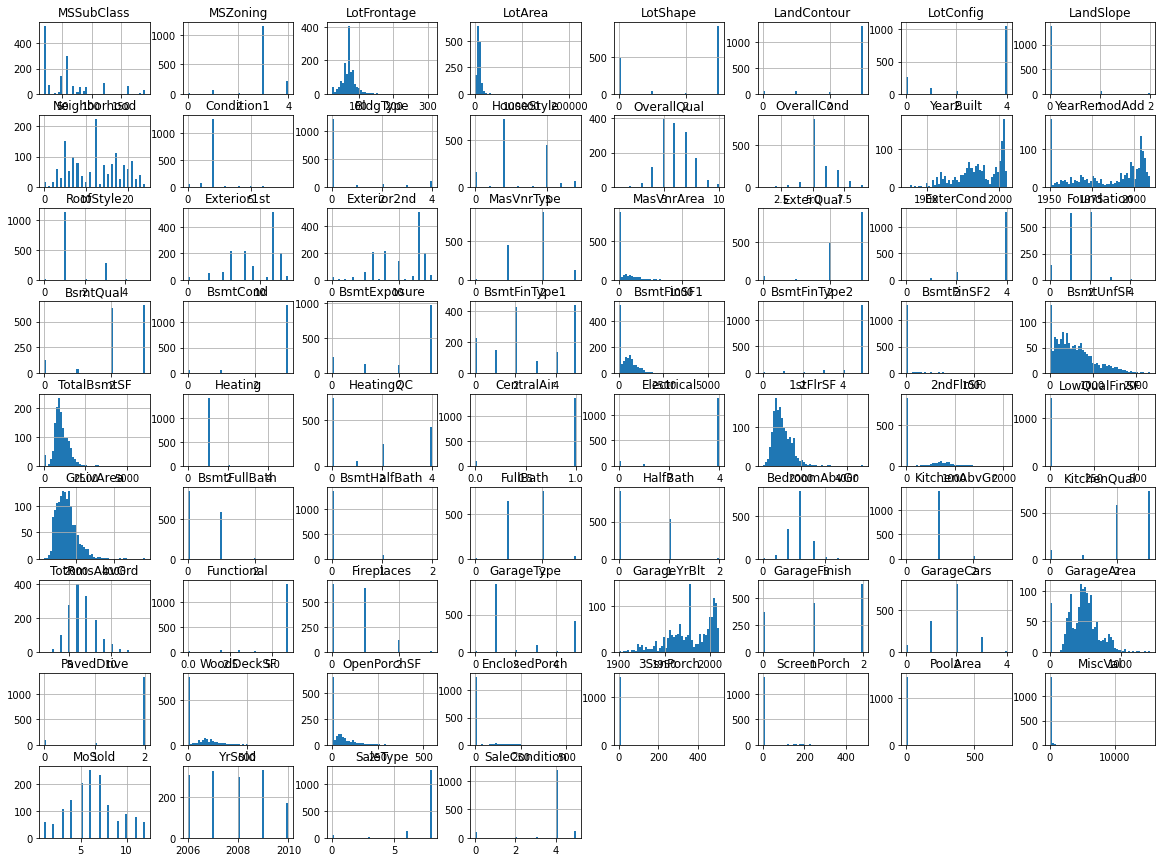

In [20]:
%matplotlib inline
X.hist(bins=50, figsize=(20,15))
plt.show()

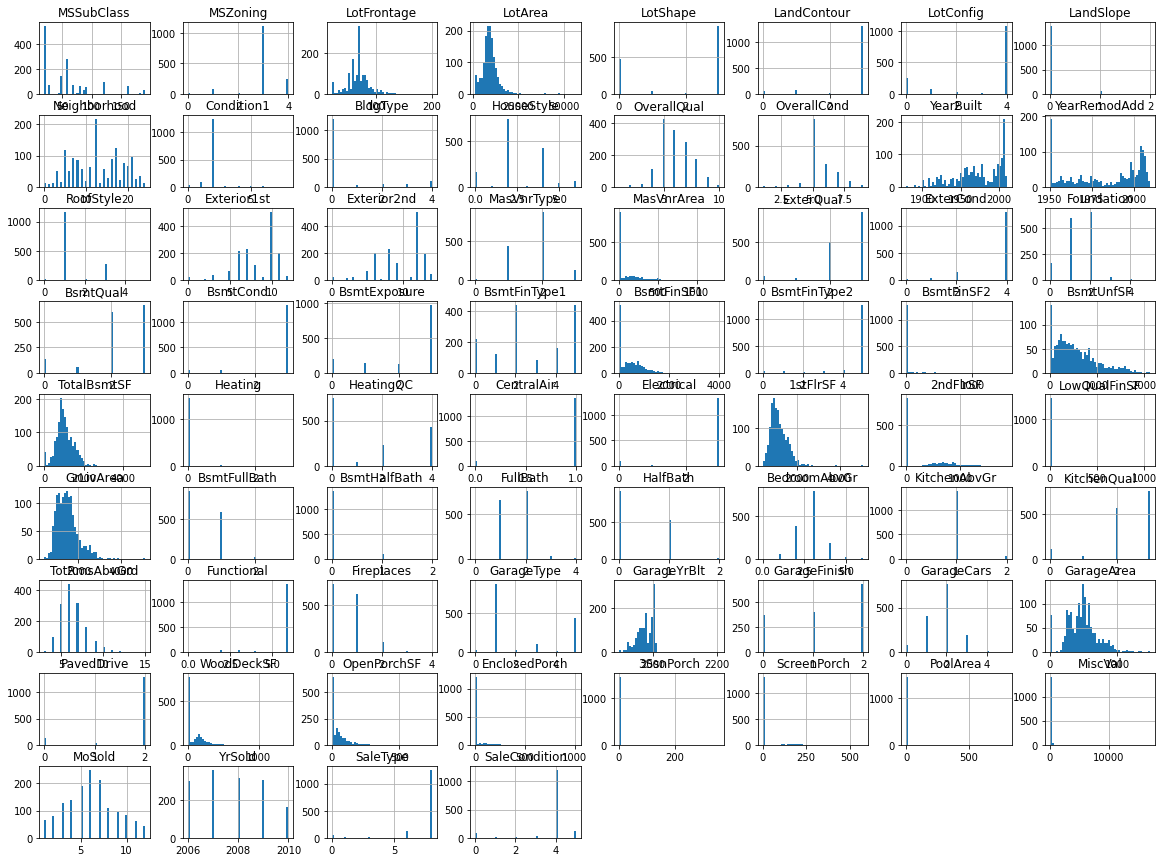

In [21]:
%matplotlib inline
X_test.hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder() 
#X_ohe = pd.DataFrame(ohe.fit_transform(X).toarray())
#X_ohe_test = pd.DataFrame(ohe.fit_transform(X_test).toarray())
#X = X.join(X_ohe)
#X

In [23]:
#X_ohe_test = pd.DataFrame(ohe.fit_transform(X_test).toarray())
#X_test = X_test.join(X_ohe_test)
#X_test

In [24]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [25]:
score = lr.score(X, y)
print(score)

0.846569124906624


In [26]:
pred_train = lr.predict(X)
pred_train

array([215700.75122337, 202085.9414221 , 221153.85074501, ...,
       245554.14700973, 149945.84048579, 158820.19202348])

In [27]:
lr.predict(X_test)

array([106780.28339352, 144866.97169783, 171072.94761654, ...,
       149068.30532685, 119422.49786385, 249150.32564054])

In [28]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(y,pred_train , squared=False)
rms

31107.17106519103

In [29]:
df = pd.DataFrame(lr.predict(X_test))
df.to_csv('result.csv')